In [84]:
import numpy as np
import matplotlib.pylab as plt
import scipy as sci
%matplotlib inline

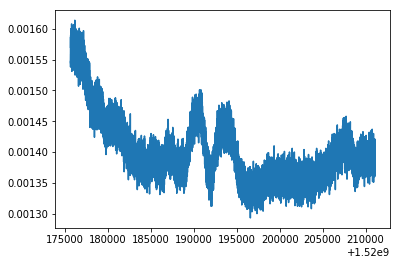

In [3]:
Timez = np.array([])
Voltz = np.array([])
for i in np.arange(39):
    x = np.load('Lab3CassA/CasA_{}.npz'.format(i))['tt']
    y = np.load('Lab3CassA/CasA_{}.npz'.format(i))['v']
    Timez = np.append(Timez, x)
    Voltz = np.append(Voltz, y)

plt.plot(Timez,Voltz)
plt.show()

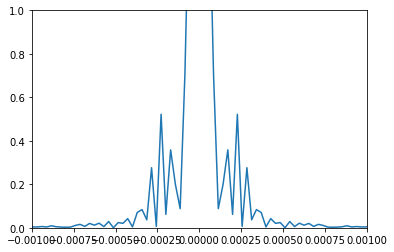

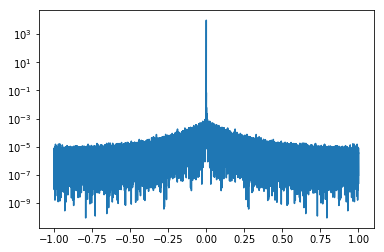

In [4]:
PS = np.abs(np.fft.fft(Voltz))**2
freq = np.fft.fftfreq(len(Timez),d=0.5)

plt.plot(np.fft.fftshift(freq),np.fft.fftshift(PS))
plt.xlim(-0.001, 0.001)
plt.ylim(0,1)
plt.show()
plt.semilogy(np.fft.fftshift(freq),np.fft.fftshift(PS))
plt.show()

In [5]:
crabx = np.load('Crab_data.npz')['tt']
craby = np.load('Crab_data.npz')['v']

(70503,)
(70503,)


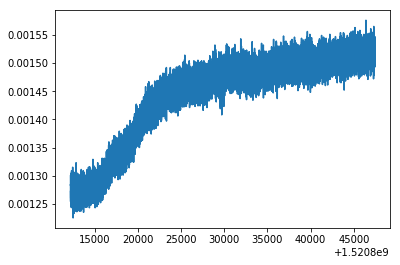

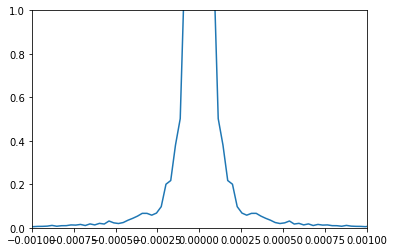

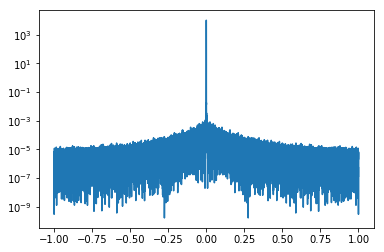

In [6]:
print(crabx.shape)
print(craby.shape)

plt.plot(crabx, craby)
plt.show()

PS = np.abs(np.fft.fft(craby))**2
freq = np.fft.fftfreq(len(crabx),d=0.5)

plt.plot(np.fft.fftshift(freq),np.fft.fftshift(PS))
plt.xlim(-0.001, 0.001)
plt.ylim(0,1)
plt.show()
plt.semilogy(np.fft.fftshift(freq),np.fft.fftshift(PS))
plt.show()

In [7]:
#Julian Date	Measured Alt	Measured Az	Correct Alt	Correct Az	westAltitude	westAzimuth	eastAltitude	eastAzimuth

data = np.loadtxt('Crab_positions.txt')

jd = np.array([])
alt = np.array([])
az = np.array([])
c_alt = np.array([])
c_az = np.array([])
alt_w = np.array([])
az_w= np.array([])
alt_e = np.array([])
az_e = np.array([])

for i in np.arange(2608):
    jd1 = data[i][0] #Julian Date
    alt1 = data[i][1] #Measured Alt
    az1 = data[i][2] #Measured Az
    c_alt1 = data[i][3] #Correct Alt
    c_az1 = data[i][4] #Correct Az
    alt_w1 = data[i][5] #westAltitude
    az_w1 = data[i][6] #westAzimuth
    alt_e1 = data[i][7] #eastAltitude
    az_e1 = data[i][8] #eastAzimuth
    jd = np.append(jd, jd1)
    alt = np.append(alt, alt1)
    az = np.append(az, az1)
    c_alt = np.append(c_alt, c_alt1)
    c_az = np.append(c_az, c_az1)
    alt_w = np.append(alt_w, alt_w1)
    az_w = np.append(az_w, az_w1)
    alt_e = np.append(alt_e, alt_e1)
    az_e = np.append(az_e, az_e1)


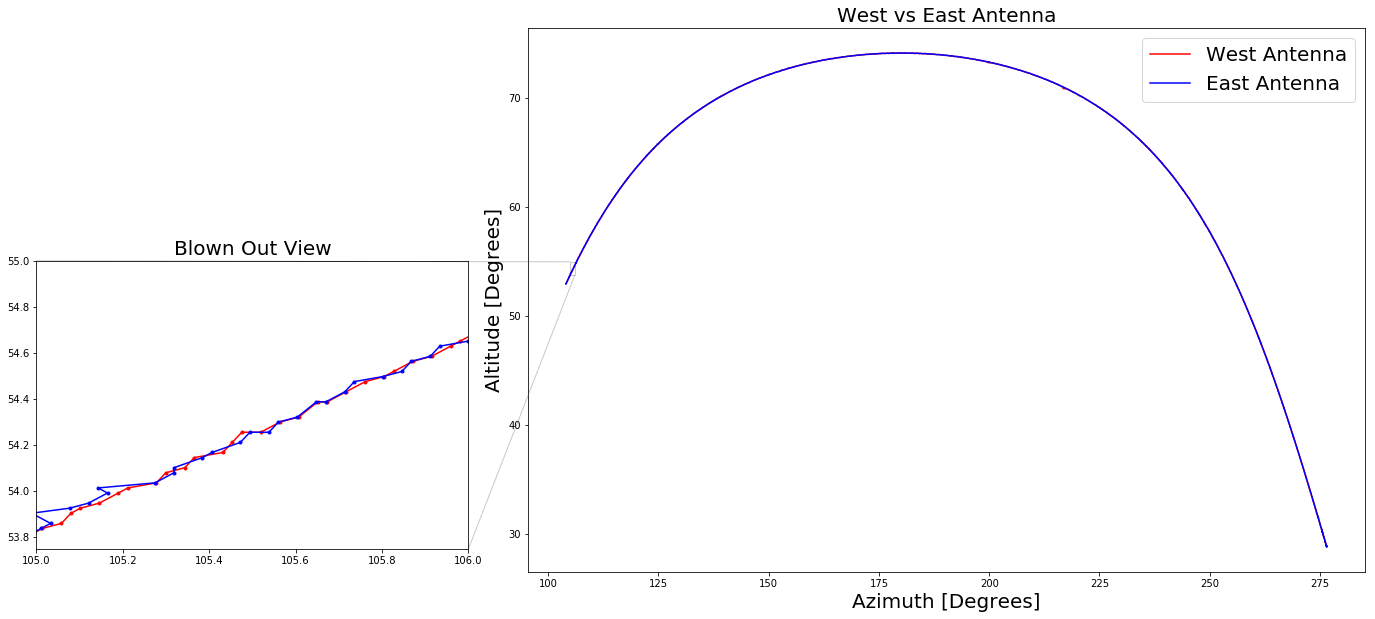

In [71]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


fig, ax = plt.subplots(figsize=(15,10))

ax.plot(az_w, alt_w, 'r-')
ax.plot(az_e, alt_w, 'b-')
plt.xlabel('Azimuth [Degrees]', fontsize=20)
plt.ylabel('Altitude [Degrees]', fontsize=20)
plt.title('West vs East Antenna', fontsize = 20)
plt.legend(['West Antenna','East Antenna'], fontsize=20)

axins = inset_axes(ax,
                  6.,4,
                  loc = 8,
                  bbox_to_anchor = (-0.13,.15),
                  bbox_transform = ax.figure.transFigure)

mark_inset(ax,
           axins,
           loc1 = 2,
           loc2 = 4,
           ec = "0.3",
           alpha= 0.3)

axins.plot(az_w, alt_w, 'r.-')
axins.plot(az_e, alt_w, 'b.-')
plt.title('Blown Out View', fontsize=20)
axins.set_ylim(53.75,55)
axins.set_xlim(105,106)
plt.show()




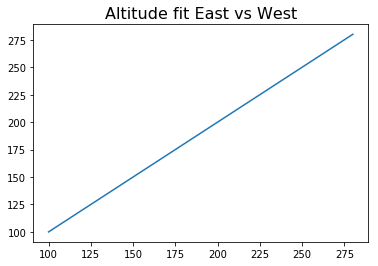

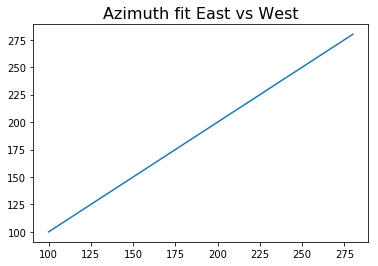

Altitude Slope =  1.000251463798076
Azimuth Slope =  0.999944965401351


In [81]:
x = np.linspace(100,280)
altfit = np.polyfit(alt_e, alt_w, 1)
azfit = np.polyfit(az_e, az_w, 1)
plt.plot(x, np.polyval(altfit, x))
plt.title('Altitude fit East vs West', fontsize=16)
plt.show()
plt.plot(x, np.polyval(azfit, x))
plt.title('Azimuth fit East vs West', fontsize=16)
plt.show()

print('Altitude Slope = ', altfit[0])
print('Azimuth Slope = ', azfit[0])

$\alpha$ = (RAh $\times $ 15 + $\dfrac{RAm}{4}$ + $\dfrac{RAs}{240}$) $\times$ π/180

$\delta$ = (DEd $\pm$ $\dfrac{DEm}{60}$ $\pm$ $\dfrac{DEs}{3600}$) $\times$ π/180

$E_1(t) = cos(2\pi\nu t)$ Voltage output of antenna 1

$E_2(t) = cos(2\pi\nu [t + \tau_{tot}])$ Voltage output of antenna 2

In [126]:


B = 20 #meters
B_ew = 20 #Basline EastWest comp
B_ns = 0 #baseline northsouth comp
dec = (22*15 + (0/4) +  (52.1/240))*(np.pi/180) #declination of crab in radian
hs = (5 + (34/60) + (31.95/3600))*(np.pi/180) #Right Acension of crab in radian
c = 3e8 #m/s
lam = 0.0025 #meters
#tau_g = (B_ew/c * np.cos(dec))*np.sin(hs)
L = 37.871853 #Terrestrial Latitude in radians


# v1 = np.cos(np.pi*craby*crabx)
# v2 = np.cos(np.pi*craby*(crabx + tau_tot))

Local Fringe Frequency =

$f_f = [\dfrac{B_{ew}}{\lambda}cos(\delta)]cos(h_{s,0}) - [\dfrac{B_{ns}}{\lambda}sin(L)cos(\delta)]sin(h_{s,0})$

Local Fringe Frequency of Crab =  [-7085.12450208 -6924.12431552 -6751.03843575 ...  6433.8872338
  6626.57291785  6807.69349376] Cycles per Radian


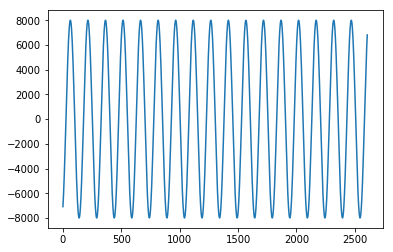

In [130]:
def convert_az_alt_to_ha_dec(az,alt,phi):
    x0 = np.cos(np.radians(alt))*np.cos(np.radians(az))
    x1 = np.cos(np.radians(alt))*np.sin(np.radians(az))
    x2 = np.sin(np.radians(alt))

    R = np.matrix([[-np.sin(np.radians(phi)),0,np.cos(np.radians(phi))],[0,-1,0],[np.cos(np.radians(phi)),0,np.sin(np.radians(phi))]])

    x = np.matrix([[x0],[x1],[x2]])

    xp = np.dot(np.transpose(R),x)

    ha = float(np.degrees(np.arctan2(xp[1],xp[0]))) + 360
    dec = float(np.degrees(np.arcsin(xp[2]))) 

    return ha, dec

ha = np.array([])
dec = np.array([])
for i in np.arange(2608):
    ha1, dec1 = convert_az_alt_to_ha_dec(az[i], alt[i], L)
    ha = np.append(ha, ha1)
    dec = np.append(dec, dec1)
    
Qns = (B_ns/lam * np.sin(L) * np.cos(dec))
Qew = (B_ew/lam * np.cos(dec))

ff = Qew*np.cos(ha) - Qns*np.sin(ha)
print('Local Fringe Frequency of Crab = ',ff, 'Cycles per Radian')
plt.plot(ff)
plt.show()

In [85]:
x = np.array([0,1,2,3,4,5])
y = np.array([0, 0.8, 0.9, 0.1,-0.8,-1])
p1 = sci.polyfit(x,y,1)
p2 = sci.polyfit(x,y,2)
p3 = sci.polyfit(x,y,3)


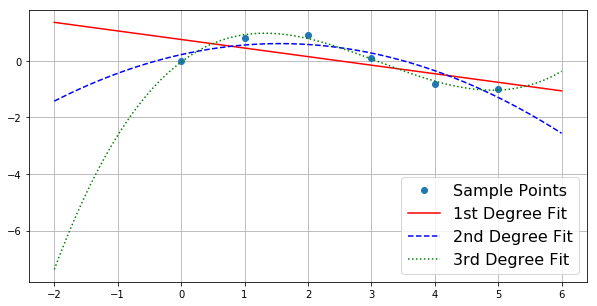

In [88]:
plt.figure(figsize=(10,5))
plt.plot(x,y, 'o')
xp = np.linspace(-2,6,100)
plt.plot(xp, np.polyval(p1,xp), 'r-')
plt.plot(xp, np.polyval(p2,xp), 'b--')
plt.plot(xp, np.polyval(p3,xp), 'g:')
plt.legend(['Sample Points','1st Degree Fit','2nd Degree Fit','3rd Degree Fit'], fontsize=16)
plt.grid(True)
plt.show()

In [94]:
yfit1 = p1[0]*x + p1[1]
yfit2 = p2[0]*x**2 + p2[1]*x + p2[2] 
yfit3 = p3[0]*x**3 + p3[1]*x**2 + p3[2]*x + p3[3]

print('1st Degree Fit = ', yfit1)
print('2nd Degree Fit = ', yfit2)
print('3rd Degree Fit = ', yfit3)

print('Actual = ', y)

1st Degree Fit =  [ 0.75714286  0.45428571  0.15142857 -0.15142857 -0.45428571 -0.75714286]
2nd Degree Fit =  [ 0.22142857  0.56142857  0.58        0.27714286 -0.34714286 -1.29285714]
3rd Degree Fit =  [-0.03968254  0.92698413  0.78888889  0.06825397 -0.71269841 -1.03174603]
Actual =  [ 0.   0.8  0.9  0.1 -0.8 -1. ]


In [114]:
def f(x,m,b):
    return m*x+b

xs = np.array([-2, -1, 0, 1, 2], dtype=np.float)
#ys = np.array([-4.84, -1.03, 1.91, 4.83, 4.79], dtype=np.float)
ys = np.array([-4.0761021 , -0.61376301,  0.96543424,  3.7373177 ,  3.86467818])

def chisq(ys, mdl, sig):
    return np.sum(np.abs(ys-mdl)**2/sig**2)

sig = 1. # assume \sigma_i^2=1
ps = [(1,1),(2,1),(1,2),(2,2)]
chisqs = [chisq(ys, f(xs,*p), sig) for p in ps]
print ('Chi-Square:', chisqs)

Chi-Square: [13.606245099534451, 3.140962559534451, 20.851115079534452, 10.385832539534452]
